<a href="https://colab.research.google.com/github/ykedarinath/Guvi_Final_Project/blob/main/Chennai_HousePrice_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chennai Houseprice Prediction**

# Data Dictionary for the Given Data Set

• AREA - The region in which the house is built in Chennai. Categorical data.

• INT_SQFT - The built area/space occupied by the house.

• DATE_SALE - Date on which the house was sold.

• DIST_MAINROAD - Distance of the house from the nearest main road.

• N_BEDROOM - Number of Bedrooms in the House.

• N_BATHROOM - Number of bathrooms in the house.

• N_ROOM - Number of rooms in the house.

• SALE_COND - Type of sale, if the sale was partial/AbNormal/Family

• PARK_FACIL - Binary Categorical Feature if the house has Parking Facility.

• DATE_BUILD - Date on which the house was built.

• BUILDTYPE - Type of construction of the building. House/Commercial/Other. Nominal Categorical data.

• UTILITY_AVAIL - Categorical data describing the availability of Utility such as Sewer.

• STREET - Categorical feature with information about the type of street outside the house.

• MZZONE - Categorical Data classifying the location of the house into various City Zones such as Agricultural/Residential/commercial etc.

• QS_ROOMS/ QS_BATHROOM/ QS_BEDROOM/ QS_OVERALL - Numeric features that are some kind of metric collected about the house (Kind of masked data).

• REG_FEE - Registration Fee

• COMMIS - Commission Fee

• SALES_PRICE - Target Vector - Sale Price of the house

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [4]:
df1 = pd.read_csv("https://github.com/ykedarinath/Guvi_Final_Project/raw/main/chennai_HP_sale_train_data.csv")

In [5]:
df = df1.copy()

In [6]:
df.shape

(7109, 22)

In [7]:
df.head(2)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770


In [8]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [9]:
df.shape[0] - len(df['PRT_ID'].unique()) # Checking for uniqueness of records

0

No duplicate id's in the data.

**Dropping Unwanted Features**-Features that does not make sense

In [10]:
df.drop(['PRT_ID','REG_FEE','COMMIS'],axis=1,inplace=True)

The below features are dropped:

1. PRT_ID --> Unique value which  lead to Overfitting of data.
2. REG_FEE, COMMIS --> Found irrelevant in price prediction as they are dependent on selling price

In [11]:
df.tail(4)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
7105,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.92,10818480
7106,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.84,8351410
7107,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.16,8507000
7108,Velachery,1896,13-07-2005,156,3.0,2.0,5,Partial,Yes,24-07-1961,Others,ELO,Paved,I,3.1,3.5,4.3,3.64,9976480


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7061 non-null   float64
 18  SALES_PR

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


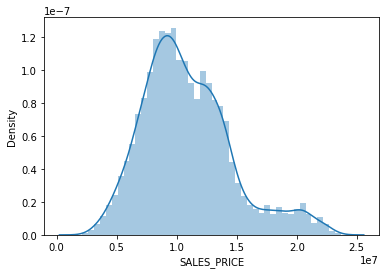

In [13]:
sns.distplot(df['SALES_PRICE'])

# **Data cleaning**

## **1)AREA**

In [14]:
df.AREA.values[0] # string format data type

'Karapakkam'

In [15]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

Found similar area names with spelling mistakes in the data, so replacing them to nearest one

In [16]:
pattern = '|'.join(['Chrompt','Chrmpet','Chormpet'])
df.AREA = df.AREA.str.replace(pattern,'Chrompet')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [17]:
for r in (("Karapakam","Karapakkam"),("KKNagar","KK Nagar"),("Velchery","Velachery"),("Adyr","Adyar"),("TNagar","T Nagar")):
  df.AREA = df.AREA.str.replace(*r)

In [18]:
pattern = '|'.join(["Ann Nagar","Ana Nagar"])
df.AREA = df.AREA.str.replace(pattern,'Anna Nagar')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [19]:
df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [20]:
df.AREA.isnull().sum() # No null values

0

## **2)INT_SQFT**

In [21]:
df.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [22]:
df.INT_SQFT.values[0] # Data in good format

1004

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'boxplot for total square feet')

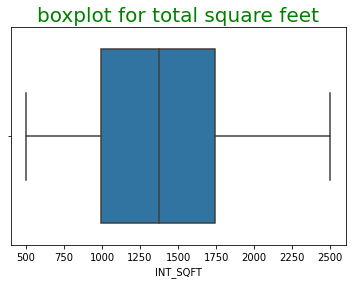

In [27]:
sns.boxplot('INT_SQFT',data=df)
plt.title("boxplot for total square feet",color='g',size=20)

No outliers in this feature.

In [28]:
df['INT_SQFT'].isnull().sum() # No null values

0

## **3)DIST_MAINROAD**

In [29]:
df.DIST_MAINROAD.values[0] # No null values

131

In [30]:
df.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'boxplot for distance from mainroad')

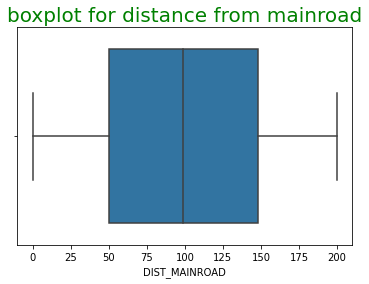

In [31]:
sns.boxplot('DIST_MAINROAD',data=df)
plt.title("boxplot for distance from mainroad",color='g',size=20)

No outliers in this feature

In [32]:
sum(df['DIST_MAINROAD'] == 0) # 33 Houses are on main road

33

In [33]:
df['DIST_MAINROAD'].max()

200

In [34]:
df['DIST_MAINROAD'].isnull().sum() # No null values

0

## **4)Number of bedrooms, bathrooms and rooms**

In [35]:
df['N_BEDROOM'].values[0] 

1.0

In [ ]:
df.N_BEDROOM.value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [36]:
df['N_BEDROOM'].isnull().sum() #one null value in number of bedrooms

1

In [37]:
df[df['N_BEDROOM'].isnull()]

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
4060,Anna Nagar,1556,16-01-2013,181,NaN,1.0,4,Partiall,No,23-01-1986,House,NoSewr,No Access,RM,4.8,2.7,2.0,3.155,10797790


In [38]:
mode1 = df['N_BEDROOM'].mode()
print(mode1[0])
df['N_BEDROOM'].fillna(mode1[0],inplace=True)

1.0


As data has more number of single bed rooms, so filling the null value with its mode.

In [39]:
df['N_BEDROOM'].isnull().sum()  # no null values

0

In [40]:
df['N_BATHROOM'].values[0] 

1.0

In [41]:
df.N_BATHROOM.value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [42]:
df['N_BATHROOM'].isnull().sum() # There are five null values in number of bathrooms feature

5

As data has more number of single bathrooms,so filling the null values with its mode.

In [43]:
mode2 = df['N_BATHROOM'].mode()
print(mode2[0])
df['N_BATHROOM'].fillna(mode1[0],inplace=True)

1.0


In [45]:
df['N_BATHROOM'].isnull().sum()

0

**Changing datatype to integer**

In [46]:
df['N_BEDROOM'] = df['N_BEDROOM'].astype('int64') 
df['N_BATHROOM'] = df['N_BATHROOM'].astype('int64')

In [47]:
df['N_ROOM'].values[0] # data is in right format

3

In [49]:
df.N_ROOM.value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

In [50]:
df['N_ROOM'].isnull().sum() # no NUll values

0

## **5)Sale condition**

In [ ]:
df['SALE_COND'].values[0]  # Data is in right format

'AbNormal'

In [51]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

Found similar sale conditions with spelling mistakes in the data, so replacing them to nearest one

In [52]:
for r in (("Adj Land","AdjLand"),("Partiall","Partial"),("Ab Normal","AbNormal"),("Ab Normal","AbNormal"),("PartiaLl","Partial")):
  df['SALE_COND'] = df['SALE_COND'].str.replace(*r)

In [53]:
df['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [54]:
df['SALE_COND'].isnull().sum() # No null values

0

## **6)Building type**

In [56]:
df['BUILDTYPE'].values[0]  # Dta is in right format

'Commercial'

In [57]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

Found similar building type names with spelling mistakes in the data, so replacing them to nearest one

In [58]:
df['BUILDTYPE'].replace("Comercial","Commercial",inplace=True)
df['BUILDTYPE'].replace('Other','Others',inplace=True)

In [59]:
df['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [60]:
df['BUILDTYPE'].isnull().sum() # No null values

0

### **7)Park facility**

In [62]:
df['PARK_FACIL'].values[0]  

'Yes'

In [63]:
df['PARK_FACIL'].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [64]:
df['PARK_FACIL'].replace("Noo","No",inplace=True)

In [65]:
df['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [66]:
df['PARK_FACIL'].isnull().sum() # NO null values

0

## **8)Utility available**

In [71]:
df['UTILITY_AVAIL'].values[0] # Data is in good format

'AllPub'

In [72]:
df['UTILITY_AVAIL'].value_counts()

NoSeWa    3700
AllPub    1887
ELO       1522
Name: UTILITY_AVAIL, dtype: int64

In [73]:
for r in (("All Pub","AllPub"),("NoSewr","NoSeWa"),("NoSeWa ","NoSeWa")):
  df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].str.replace(*r)

In [74]:
df['UTILITY_AVAIL'].value_counts()

NoSeWa    3700
AllPub    1887
ELO       1522
Name: UTILITY_AVAIL, dtype: int64

In [75]:
df['UTILITY_AVAIL'].isnull().sum() # No null values

0

## **9)Street**

In [ ]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

Found similar street names with spelling mistakes in the data, so replacing them to nearest one

In [76]:
for r in (("Pavd","Paved"),("NoAccess","No Access")):
  df['STREET'] = df['STREET'].str.replace(*r)

In [77]:
df['STREET'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [78]:
df['STREET'].isnull().sum() # no null values

0

## **10)MZZONE**

In [ ]:
df['MZZONE'].values[0]  # data is in good format

'A'

In [79]:
df['MZZONE'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [80]:
df['MZZONE'].isnull().sum() # No null values

0

In [81]:
df.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

## **11)QS_OVERALL**

In [83]:
df['QS_OVERALL'].describe()

count    7109.000000
mean        3.503254
std         0.525440
min         2.000000
25%         3.130000
50%         3.503254
75%         3.880000
max         4.970000
Name: QS_OVERALL, dtype: float64

In [85]:
mean = df['QS_OVERALL'].mean()  # Filling null values with mean
df['QS_OVERALL'].fillna(mean,inplace=True)

**Outlier cleaning**

In [86]:
#IQR
q3 = df.QS_OVERALL.quantile(0.75)
q1 = df.QS_OVERALL.quantile(0.25)
iqr = q3 - q1 
ub = q3 + (1.5 * iqr)
lb = q1 - (1.5*iqr)
print(lb,ub)

2.005 5.005


In [87]:
df.QS_OVERALL = df.QS_OVERALL.clip(lb,ub)  #stripping/clipping

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

Text(0.5, 0.98, 'OUTLIERS')

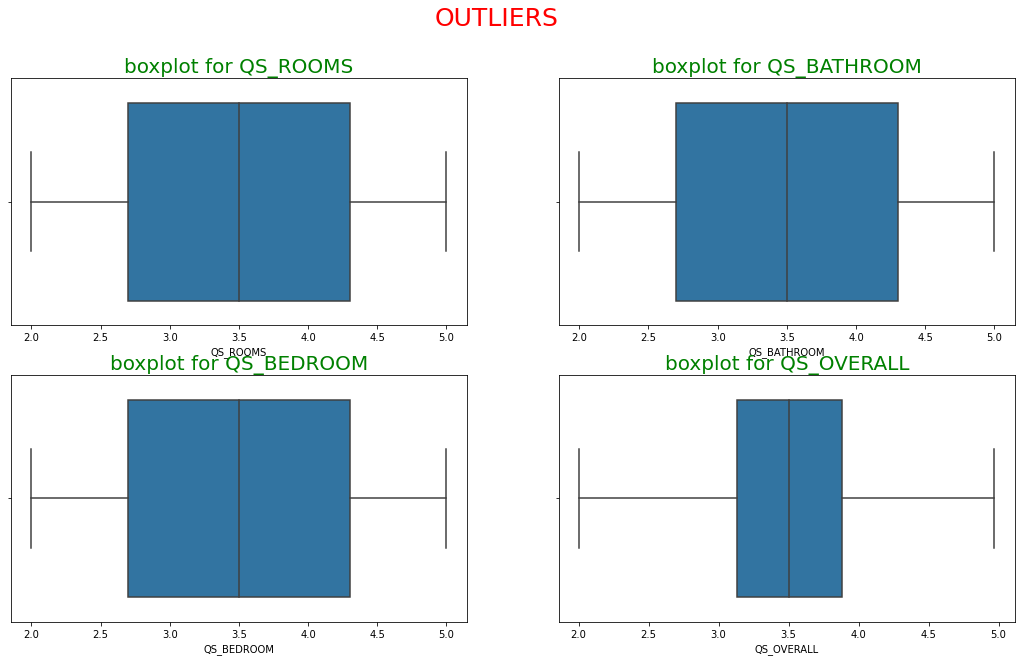

In [89]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.boxplot('QS_ROOMS',data=df)
plt.title("boxplot for QS_ROOMS",color='g',size=20)
plt.subplot(2,2,2)
sns.boxplot('QS_BATHROOM',data=df)
plt.title("boxplot for QS_BATHROOM",color='g',size=20)
plt.subplot(2,2,3)
sns.boxplot('QS_BEDROOM',data=df)
plt.title("boxplot for QS_BEDROOM",color='g',size=20)
plt.subplot(2,2,4)
sns.boxplot('QS_OVERALL',data=df)
plt.title("boxplot for QS_OVERALL",color='g',size=20)
plt.suptitle("OUTLIERS",color='r',size=25)

No Ouliers in the data.

## **12)Date sale and build**

In [90]:
df['DATE_SALE'] = df['DATE_SALE'].apply(pd.to_datetime)
df['Year_sold'] = df['DATE_SALE'].dt.year

In [91]:
df['DATE_BUILD'] = df['DATE_BUILD'].astype('datetime64[ns]')
df['Year_built'] = pd.DatetimeIndex(df['DATE_BUILD']).year

In [92]:
df['Property_age'] = df['Year_sold'] - df['Year_built'] # calculating property age( years )

In [93]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Year_sold,Year_built,Property_age
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,...,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967,44
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,...,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995,11
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,...,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,1992,20
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,...,Paved,I,4.7,3.9,3.6,4.010,9630290,2010,1988,22
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,...,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009,1979,30


In [94]:
(df['Property_age'] == 0).sum()

0

In [95]:
df.shape

(7109, 22)

In [96]:
df.dtypes 

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
Year_sold                 int64
Year_built                int64
Property_age              int64
dtype: object

In [97]:
df.isnull().sum() # No null values in the data

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
Year_sold        0
Year_built       0
Property_age     0
dtype: int64

In [98]:
df.duplicated().sum() # No duplicates in the data

0

Data is cleaned and is in good format for exploratory analysis.

# **EDA**

## **1)Area**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


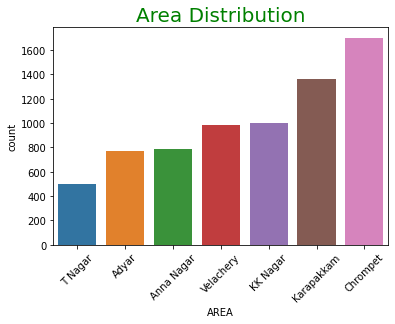

In [99]:
sns.countplot(df['AREA'],order = df['AREA'].value_counts().index[::-1])
plt.title("Area Distribution",color='g',size=20)
plt.xticks(rotation=45)
plt.show()

**INSIGHTS:**

There are more number of  houses in Chrompet area , Less number of houses in T nagar


In [100]:
area_order = df.groupby(['AREA'])['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']
area_order

4    Karapakkam
0         Adyar
2      Chrompet
6     Velachery
3      KK Nagar
1    Anna Nagar
5       T Nagar
Name: AREA, dtype: object

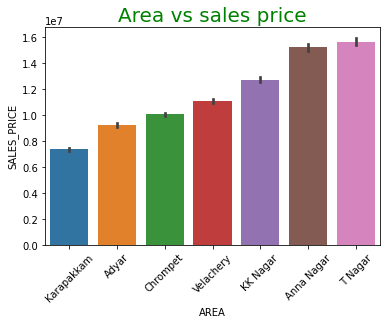

In [102]:
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order=area_order)
plt.title("Area vs sales price",color='g',size=20)
plt.xticks(rotation=45)
plt.show()

**INSIGHTS:**

Though there are less number of houses in T nagar, the cost of those houses is very high compared to others.The price of Karapakkam houses is very less.This area also has second highest number of houses.Chrompet house prices are average, it has highest number of houses.

**Insights from feature and target variable:**

There is relationship between area and sales price(Target variable). When area is changing, sales price is also changing.There is linear relationship between area and target variable.As there is ordinal relationship, we can do label encoding here.



## **2)INT_SQFT**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


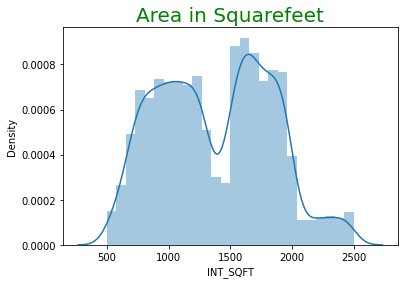

In [104]:
sns.distplot(df['INT_SQFT'])
plt.title('Area in Squarefeet',color='g',size=20)
plt.show()

There are more number of houses with Area of range 1500 sqft to 2000 sq ft

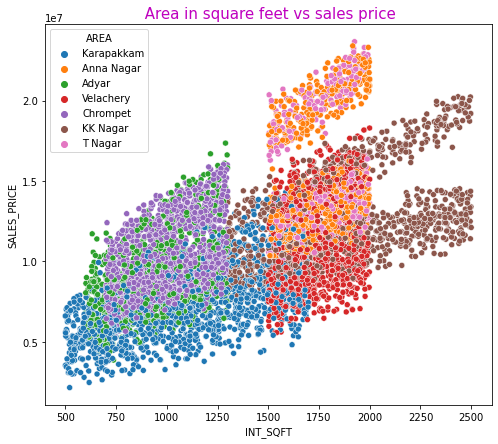

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.612125
SALES_PRICE,0.612125,1.000000


In [105]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='INT_SQFT',y='SALES_PRICE',hue='AREA',data=df)
plt.title(' Area in square feet vs sales price',color='m',size=15)
plt.show()
df[['INT_SQFT','SALES_PRICE']].corr()

**INSIGHTS:**

Karapakkam, adyar and chrompet area is suitable for people who prefer to have less area of house (Of all the three , karapakkam has less price.).Velachery, T Nagar, Anna Nagar and some KK Nagar areas are suitable for people whos choose to have medium house area (Anna Nagar and T Nagar have high house prices)
Only kk nagar has largest area homes. So people who prefer to have area more than 2000sqft should definitely go for kk nagar.

**Insights from feature vs target variable**:

There is a relationship between square feet of house and sales price 

A very good linear relationship is found, As square feet increases, sales price decreases which is in-line with our general knowledge 

No transformation required



## **3)DIST_MAINROAD**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


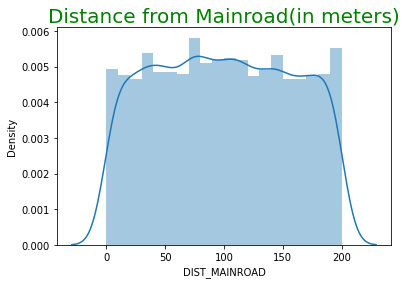

In [107]:
sns.distplot(df['DIST_MAINROAD'])
plt.title('Distance from Mainroad(in meters)',color='g',size=20)
plt.show()

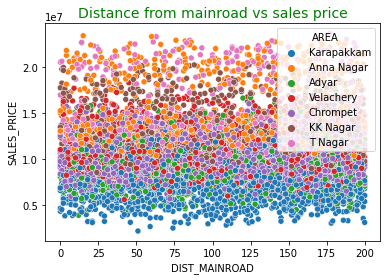

In [110]:
sns.scatterplot(x='DIST_MAINROAD',y='SALES_PRICE',hue='AREA',data=df)
plt.title('Distance from mainroad vs sales price',color='g',size=14)
plt.show()

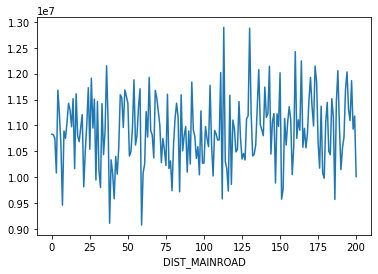

In [111]:
df.groupby('DIST_MAINROAD')['SALES_PRICE'].mean().plot()
plt.show()

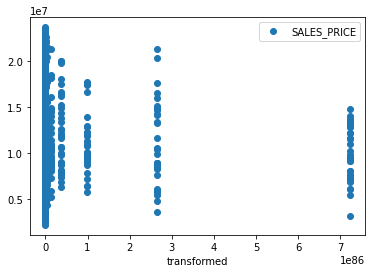

,transformed,SALES_PRICE
transformed,0.000000,-0.013603
SALES_PRICE,-0.013603,1.000000


In [112]:
df['transformed'] = np.exp(df['DIST_MAINROAD'])
df.plot(x='transformed', y='SALES_PRICE', style='o')
plt.show()
df[['transformed','SALES_PRICE']].corr()

**Insights from feature vs target variable:** 

There is no sort of relationship between distance from main road and sales price . Having tried all trasnformations - still not able to find a good linear relationship , so dropping the feature



## **4)N_BEDROOM**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


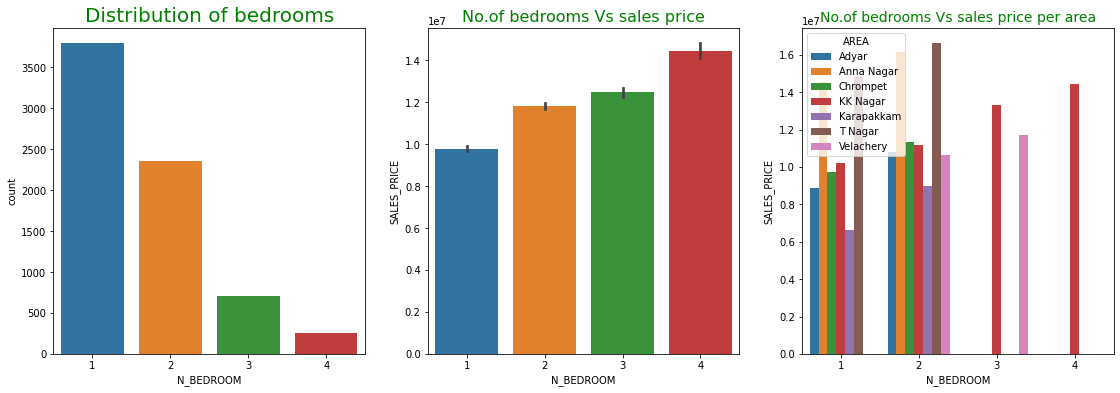

In [115]:
plt.figure(figsize=(19,6))
plt.subplot(1,3,1)
sns.countplot(df['N_BEDROOM'])
plt.title("Distribution of bedrooms",color='g',size=20)
plt.subplot(1,3,2)
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df)
plt.title("No.of bedrooms Vs sales price",color='g',size=16)
plt.subplot(1,3,3)
a = df.groupby(['AREA','N_BEDROOM'])['SALES_PRICE'].mean().reset_index()
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',hue='AREA',data=a)
plt.title("No.of bedrooms Vs sales price per area",color='g',size=14)
plt.show()

**INSIGHTS:** 

There are more single bedroom houses and less number of 4 bedroomed houses.
The sale price of 4 bedroomed house is highest, single bedroomed is lowest,Which is inline with our general knowledge.

Only kk nagar has 4 bedroomed houses (which has largest area).only velachery and kk nagar has 3 bedroomed houses.T nagar and Anna nagar which has higest priced houses, only have 1 and 2 bedroomed houses.

**Insights from feature vs target variable:**

1.   There is relationship between number of bedrooms and sales price

2.   There is linear relationship between number of bedrooms and sales price,As number of bedrooms increases, sales price increases. Which is inline with our general knowledge.

3.   No transformation required & No endcoding required.

## **5)N_BATHROOM**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


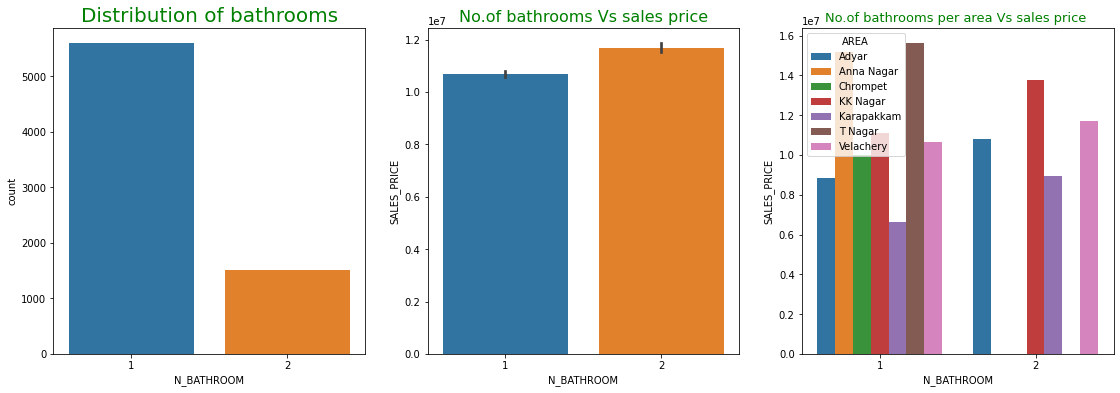

In [116]:
plt.figure(figsize=(19,6))
plt.subplot(1,3,1)
sns.countplot(df['N_BATHROOM'])
plt.title("Distribution of bathrooms",color='g',size=20)
plt.subplot(1,3,2)
sns.barplot(x='N_BATHROOM',y='SALES_PRICE',data=df)
plt.title("No.of bathrooms Vs sales price",color='g',size=16)
plt.subplot(1,3,3)
a = df.groupby(['AREA','N_BATHROOM'])['SALES_PRICE'].mean().reset_index()
sns.barplot(x='N_BATHROOM',y='SALES_PRICE',hue='AREA',data=a)
plt.title("No.of bathrooms per area Vs sales price ",color='g',size=13)
plt.show()

**INSIGHTS:**

There are More houses with single bathroom.
The price of 2 bathroomed houses is higher than single bathroom houses,  which is inline with our general knowledge.
T nagar and Anna nagar which has higest priced homes, only have single bathroomes in them. Chrompet which has more number of houses also has only one bathroom.

**Insights from feature vs target variable:**

1.   There is relationship between number of bathrooms and sales price.

2.   There is linear relationship between number of bathrooms and sales price,As number of bahrooms increases, sales price increases. Which is inline with our general knowledge.

3.   No transformation required and encoding also not required.

## **6)N_ROOM**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


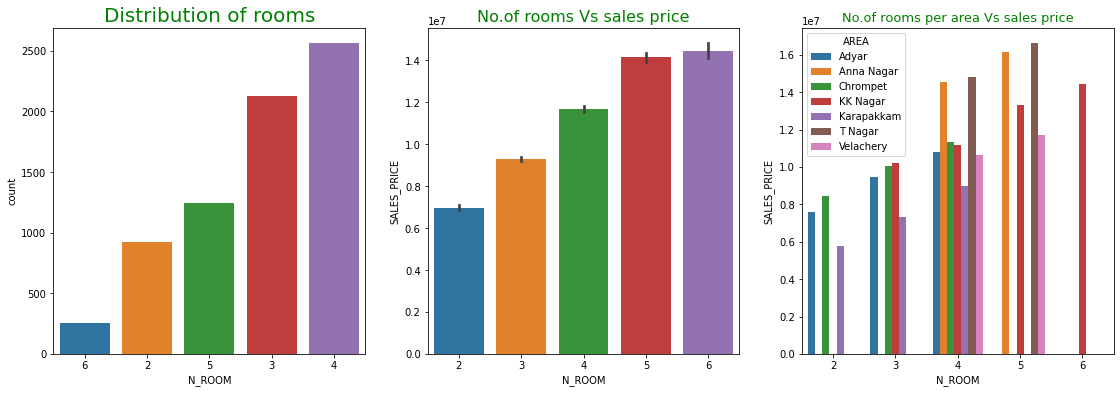

In [117]:
plt.figure(figsize=(19,6))
plt.subplot(1,3,1)
sns.countplot(df['N_ROOM'],order=df['N_ROOM'].value_counts().index[::-1])
plt.title("Distribution of rooms",color='g',size=20)
plt.subplot(1,3,2)
sns.barplot(x='N_ROOM',y='SALES_PRICE',data=df)
plt.title("No.of rooms Vs sales price",color='g',size=16)
plt.subplot(1,3,3)
a = df.groupby(['AREA','N_ROOM'])['SALES_PRICE'].mean().reset_index()
sns.barplot(x='N_ROOM',y='SALES_PRICE',hue='AREA',data=a)
plt.title("No.of rooms per area Vs sales price",color='g',size=13)
plt.show()

**INSIGHTS:**

There are more number of houses with 4 rooms and less with six rooms.
The price of six roomed houses is highest as usual with our general knowledge.

**Insights from feature vs target variable:** 

1.   There is relationship between number of rooms and sales price.

2.   There is linear relationship between number of rooms and sales price,As number of rooms increases, sales price increases. Which is inline with our general knowledge.

3.   Transformation and encoding is not required.

## **7)SALE_COND**

In [119]:
salescond_order = df.groupby(['SALE_COND'])['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']
salescond_order

4        Partial
2         Family
0       AbNormal
3    Normal Sale
1        AdjLand
Name: SALE_COND, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


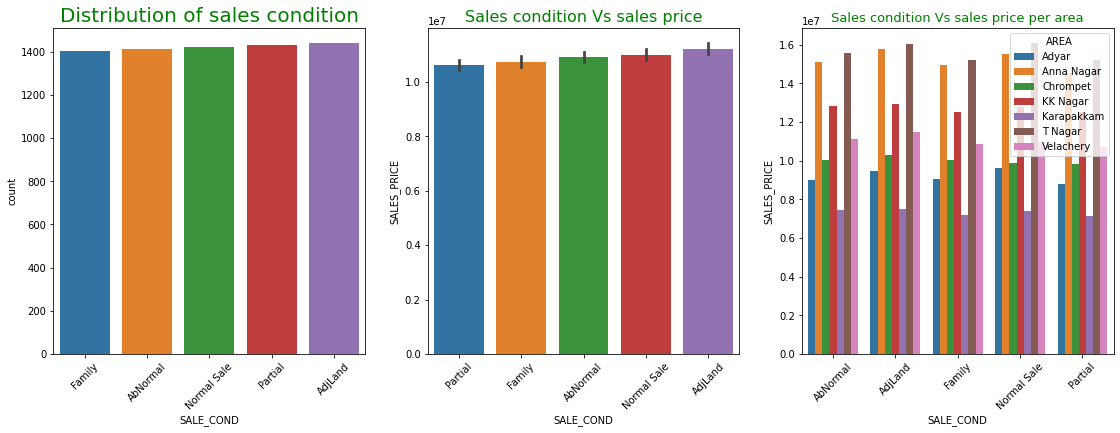

In [120]:
plt.figure(figsize=(19,6))
plt.subplot(1,3,1)
sns.countplot(df['SALE_COND'],order=df['SALE_COND'].value_counts().index[::-1])
plt.title("Distribution of sales condition",color='g',size=20)
plt.xticks(rotation=45)
plt.subplot(1,3,2)
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=df,order=salescond_order)
plt.title("Sales condition Vs sales price",color='g',size=16)
plt.xticks(rotation=45)
plt.subplot(1,3,3)
a = df.groupby(['AREA','SALE_COND'])['SALES_PRICE'].mean().reset_index()
sns.barplot(x='SALE_COND',y='SALES_PRICE',hue='AREA',data=a)
plt.title("Sales condition Vs sales price per area",color='g',size=13)
plt.xticks(rotation=45)
plt.show()

We can see that sale condition is almost equally distributed. All types of sales condition has almost equal number of houses.

**Insights from feature vs target variable:**

1. Sales price VS sales condition is Uniformly distributed.

2. Sales cond and sale price has very little relationship, Feature is changing, target variable is not changing much (no considerable change).

3. I have decideded to drop the feature as it is not going to explain the target variable.

## **8)PARK_FACIL**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


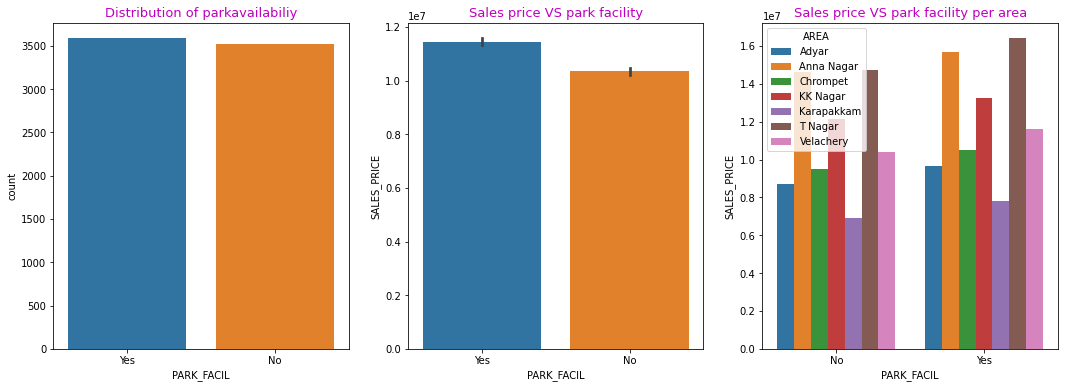

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.countplot(df['PARK_FACIL'])
plt.title("Distribution of parkavailabiliy",color='g',size=20)
plt.subplot(1,3,2)
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df)
plt.title("Sales price VS park facility",color='g',size=16)
plt.subplot(1,3,3)
a = df.groupby(['AREA','PARK_FACIL'])['SALES_PRICE'].mean().reset_index()
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',hue='AREA',data=a)
plt.title("Sales price VS park facility per area",color='g',size=13)
plt.show()

The number of houses and price of those houses having park availability are slightly a bit more than the houses not having park facility.

**Insights from feature vs target variable:**

1.   Sales price VS park facility has relationship.

2.   There is linear relationship between park facility and sales price, the houses with park facility has high sales price. Which is inline with our general knowledge.

3.   No transformation required.

## **9)BUILDTYPE**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


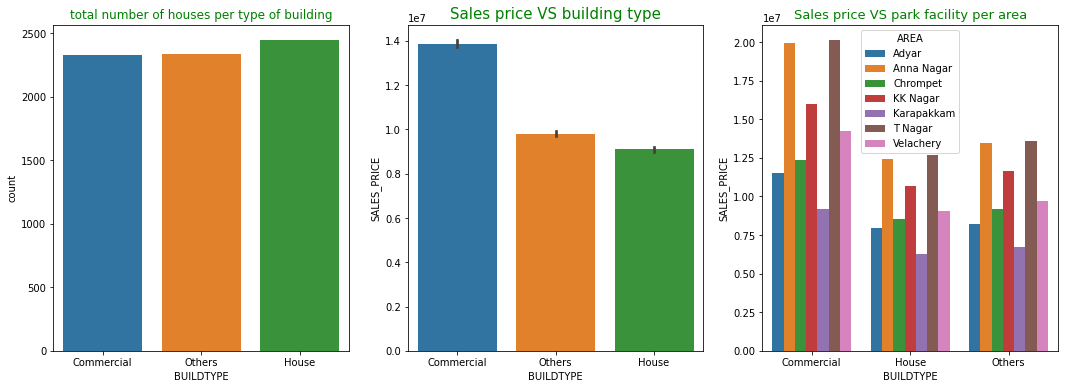

In [123]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.countplot(df['BUILDTYPE'])
plt.title("total number of houses per type of building",color='g',size=12)
plt.subplot(1,3,2)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df)
plt.title("Sales price VS building type",color='g',size=15)
plt.subplot(1,3,3)
a = df.groupby(['AREA','BUILDTYPE'])['SALES_PRICE'].mean().reset_index()
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',hue='AREA',data=a)
plt.title("Sales price VS park facility per area",color='g',size=13)
plt.show()

**Insights from feature vs target variable:**

1. When Build_type changing, sales price is also changing, so there is relationship between building type and sales price.

2. But There is no straight-line relationship, so No linear relationship between building type and sales price(From commercial to other, there is linear relationship but from others to House, no linear
So, no linear relationship with target variable)

3. I have decided to do one-hot encoding, as there is no ordinal relationship.

## **10)UTILITY_AVAIL**

In [125]:
utility_order = df.groupby(['UTILITY_AVAIL'])['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL']
utility_order

1       ELO
2    NoSeWa
0    AllPub
Name: UTILITY_AVAIL, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


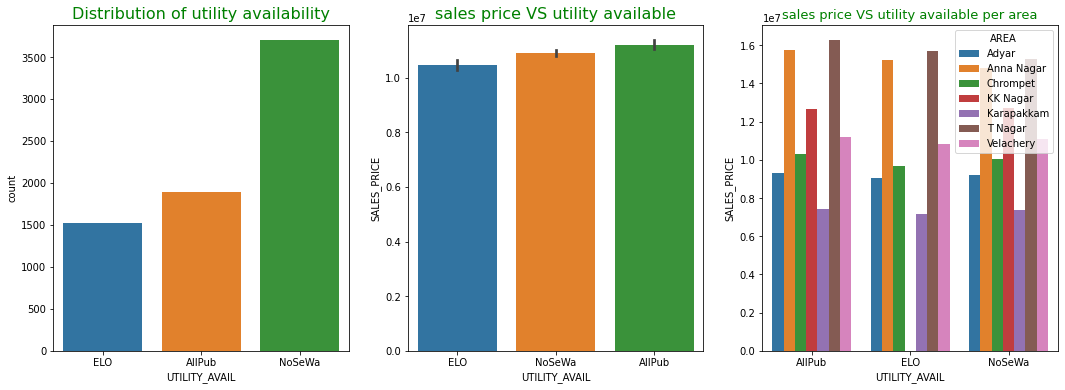

In [128]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.countplot(df['UTILITY_AVAIL'],order=df['UTILITY_AVAIL'].value_counts().index[::-1])
plt.title("Distribution of utility availability",color='g',size=16)
plt.subplot(1,3,2)
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=utility_order)
plt.title("sales price VS utility available",color='g',size=16)
plt.subplot(1,3,3)
a = df.groupby(['AREA','UTILITY_AVAIL'])['SALES_PRICE'].mean().reset_index()
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',hue='AREA',data=a)
plt.title("sales price VS utility available per area",color='g',size=13)
plt.show()

**Insights from feature vs target variable:**

1.   There is relationship between Utility available and sales price(Target variable). When Utility is changing, sales price is also changing.

2.   There is linear relationship between Utility and target variable.

3.   So there is ordinal relationship, we can do label encoding here.

## **11)STREET**

In [129]:
street_order = df.groupby(['STREET'])['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']
street_order

1    No Access
2        Paved
0       Gravel
Name: STREET, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


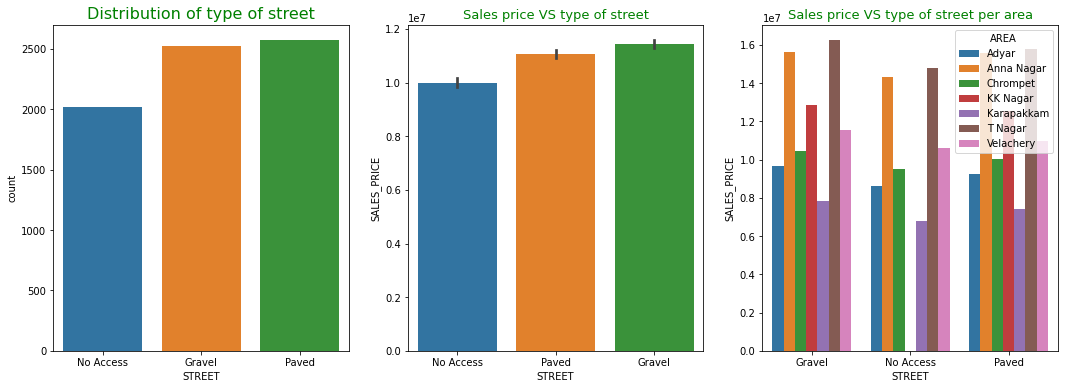

In [131]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.countplot(df['STREET'],order=df['STREET'].value_counts().index[::-1])
plt.title("Distribution of type of street",color='g',size=16)
plt.subplot(1,3,2)
sns.barplot(x='STREET',y='SALES_PRICE',data=df,order=street_order)
plt.title("Sales price VS type of street",color='g',size=13)
plt.subplot(1,3,3)
a = df.groupby(['AREA','STREET'])['SALES_PRICE'].mean().reset_index()
sns.barplot(x='STREET',y='SALES_PRICE',hue='AREA',data=a)
plt.title("Sales price VS type of street per area",color='g',size=13)
plt.show()

**Insights from feature vs target variable:**

1.   There is relationship between type of street and sales price(Target variable). When street type, sales price is also changing.

2.   There is linear relationship between street and target variable.

3.   So there is ordinal relationship, we can do label encoding here.

## **12)MZZONE**

In [132]:
zone_order = df.groupby(['MZZONE'])['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE']
zone_order

0     A
1     C
2     I
3    RH
4    RL
5    RM
Name: MZZONE, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


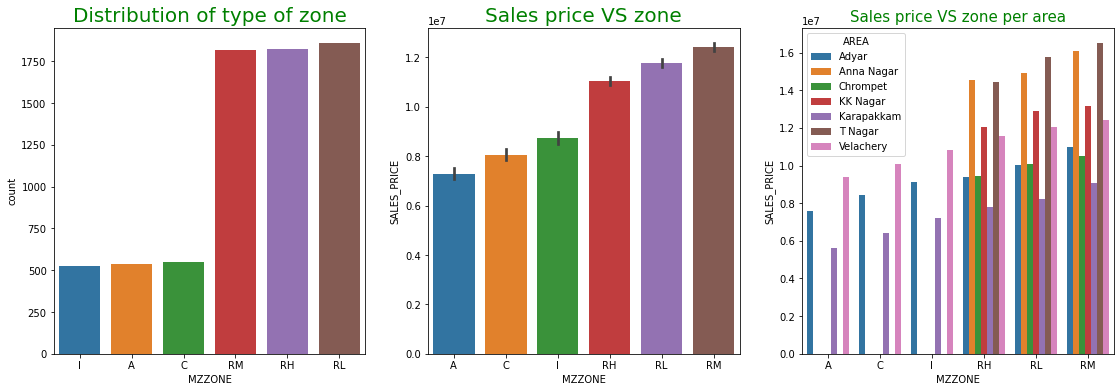

In [133]:
plt.figure(figsize=(19,6))
plt.subplot(1,3,1)
sns.countplot(df['MZZONE'],order=df['MZZONE'].value_counts().index[::-1])
plt.title("Distribution of type of zone",color='g',size=20)
plt.subplot(1,3,2)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order=zone_order)
plt.title("Sales price VS zone",color='g',size=20)
plt.subplot(1,3,3)
a = df.groupby(['AREA','MZZONE'])['SALES_PRICE'].mean().reset_index()
sns.barplot(x='MZZONE',y='SALES_PRICE',hue='AREA',data=a)
plt.title("Sales price VS zone per area",color='g',size=15)
plt.show()

**Insights from feature vs target variable:**

1.   There is relationship between zone and sales price(Target variable). When zone type changes, sales price is also changing.

2.   There is piecewise linear relationship between street and target variable. A, C, I are linear & I to RH there is jump(Piecewise linear ) & RH,RL,RM - linear.

3.   we can do label encoding here but need to consider the sudden jump from I to RH. So we can encode them as 0,1,2,4,5,6(Skipping 3 by Considering Piecewise linear)

In [134]:
df.head(2)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Year_sold,Year_built,Property_age,transformed
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,...,A,4.0,3.9,4.9,4.330,7600000,2011,1967,44,7.808671e+56
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,...,RH,4.9,4.2,2.5,3.765,21717770,2006,1995,11,1.957296e+11


## **13**)QS_ROOMS

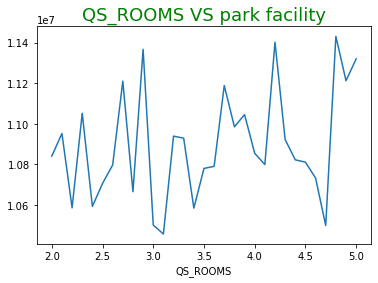

,QS_ROOMS,SALES_PRICE
QS_ROOMS,1.000000,0.021967
SALES_PRICE,0.021967,1.000000


In [139]:
df.groupby('QS_ROOMS')['SALES_PRICE'].mean().plot()
plt.title("QS_ROOMS VS park facility",color='g',size=18)
plt.show()
df[['QS_ROOMS','SALES_PRICE']].corr()

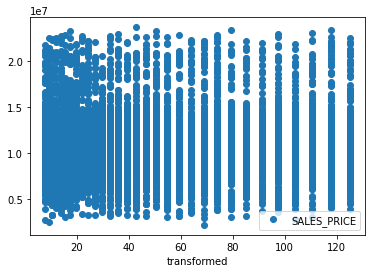

,transformed,SALES_PRICE
transformed,1.000000,0.024139
SALES_PRICE,0.024139,1.000000


In [140]:
df['transformed'] = np.power(df['QS_ROOMS'],3)
df.plot(x='transformed', y='SALES_PRICE', style='o')
plt.show()
df[['transformed','SALES_PRICE']].corr()

**Insights from feature vs target variable:**

As there is no linear relationship between QS_ROOMS and sales price.Having tried all trasnformations and still not able to see a good linear relationship.so dropping the feature

## **14)QS_BATHROOM**

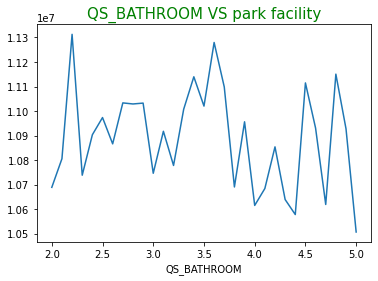

,QS_BATHROOM,SALES_PRICE
QS_BATHROOM,1.000000,-0.011377
SALES_PRICE,-0.011377,1.000000


In [138]:
df.groupby('QS_BATHROOM')['SALES_PRICE'].mean().plot()
plt.title("QS_BATHROOM VS park facility",color='g',size=15)
plt.show()
df[['QS_BATHROOM','SALES_PRICE']].corr()

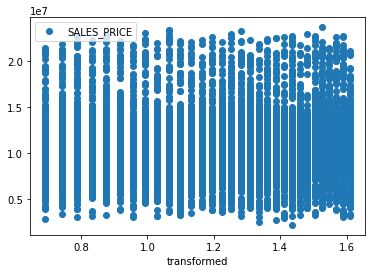

,transformed,SALES_PRICE
transformed,1.000000,-0.009902
SALES_PRICE,-0.009902,1.000000


In [141]:
df['transformed'] = np.log(df['QS_BATHROOM'])
df.plot(x='transformed', y='SALES_PRICE', style='o')
plt.show()
df[['transformed','SALES_PRICE']].corr()

**Insights from feature vs target variable:**

As there is no linear relationship between QS_BATHROOM and sales price.Having  tried all trasnformations and still not able to see a good linear relationship  so dropping the feature.

## **15)QS_BEDROOM**

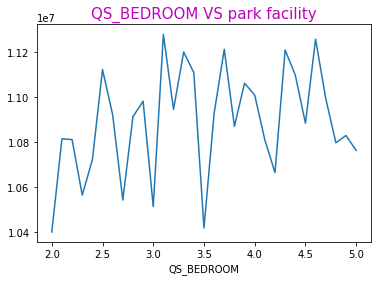

,QS_BEDROOM,SALES_PRICE
QS_BEDROOM,1.000000,0.018804
SALES_PRICE,0.018804,1.000000


In [142]:
df.groupby('QS_BEDROOM')['SALES_PRICE'].mean().plot()
plt.title("QS_BEDROOM VS park facility",color='m',size=15)
plt.show()
df[['QS_BEDROOM','SALES_PRICE']].corr()

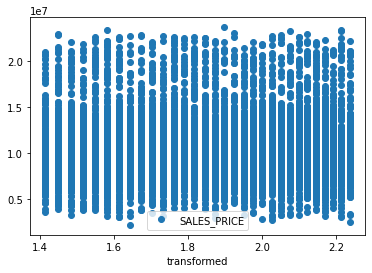

,transformed,SALES_PRICE
transformed,1.00000,0.01993
SALES_PRICE,0.01993,1.00000


In [143]:
df['transformed'] = np.power(df['QS_BEDROOM'],0.5)
df.plot(x='transformed', y='SALES_PRICE', style='o')
plt.show()
df[['transformed','SALES_PRICE']].corr()

**Insights from feature vs target variable:**

As there is no linear relationship between QS_BEDROOM and sales price.Having  tried all trasnformations and still not able to see a good linear relationship  so dropping the feature.

## **16)QS_OVERALL**

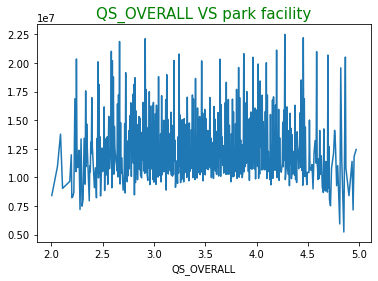

,QS_OVERALL,SALES_PRICE
QS_OVERALL,1.000000,0.020484
SALES_PRICE,0.020484,1.000000


In [144]:
df.groupby('QS_OVERALL')['SALES_PRICE'].mean().plot()
plt.title("QS_OVERALL VS park facility",color='g',size=15)
plt.show()
df[['QS_OVERALL','SALES_PRICE']].corr()

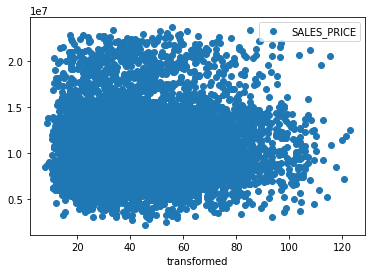

,transformed,SALES_PRICE
transformed,1.000000,0.020377
SALES_PRICE,0.020377,1.000000


In [145]:
df['transformed'] = np.power(df['QS_OVERALL'],3)
df.plot(x='transformed', y='SALES_PRICE', style='o')
plt.show()
df[['transformed','SALES_PRICE']].corr()

**Insights from feature vs target variable:**

As there is no linear relationship between QS_OVERALL and sales price.Having  tried all trasnformations and still not able to see a good linear relationship  so dropping the feature.

## **17)Year sold**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

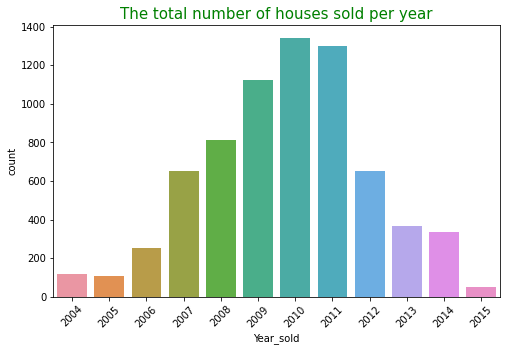

In [147]:
plt.figure(figsize=(8,5))
sns.countplot(df['Year_sold'])
plt.title("The total number of houses sold per year",color='g',size=15)
plt.xticks(rotation=45)

**INSIGHTS:**

1. More houses are sold in year 2010. 
2. Less number of houses are sold in 2015.

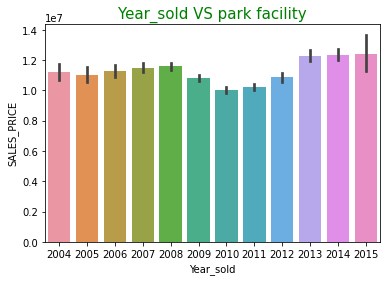

,Year_sold,SALES_PRICE
Year_sold,1.000000,0.000906
SALES_PRICE,0.000906,1.000000


In [148]:
sns.barplot(x='Year_sold',y='SALES_PRICE',data=df)
plt.title("Year_sold VS park facility",color='g',size=15)
plt.show()
df[['Year_sold','SALES_PRICE']].corr()

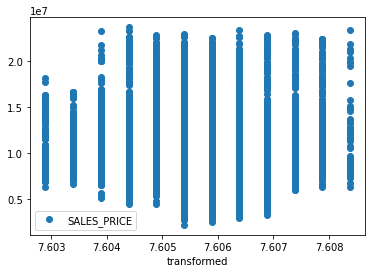

,transformed,SALES_PRICE
transformed,1.000000,0.000813
SALES_PRICE,0.000813,1.000000


In [149]:
df['transformed'] = np.log(df['Year_sold'])
df.plot(x='transformed', y='SALES_PRICE', style='o')
plt.show()
df[['transformed','SALES_PRICE']].corr()

**Insights from feature vs target variable:**

As there is no linear relationship between year_sold and sales price.Having tried all trasnformations and still not able to see a good linear relationship so dropping the feature.

## **18)Year_built**

In [150]:
df['Year_built'].value_counts()[:5]

1985    200
1988    197
2002    194
1990    191
1999    189
Name: Year_built, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 <a list of 62 Text major ticklabel objects>)

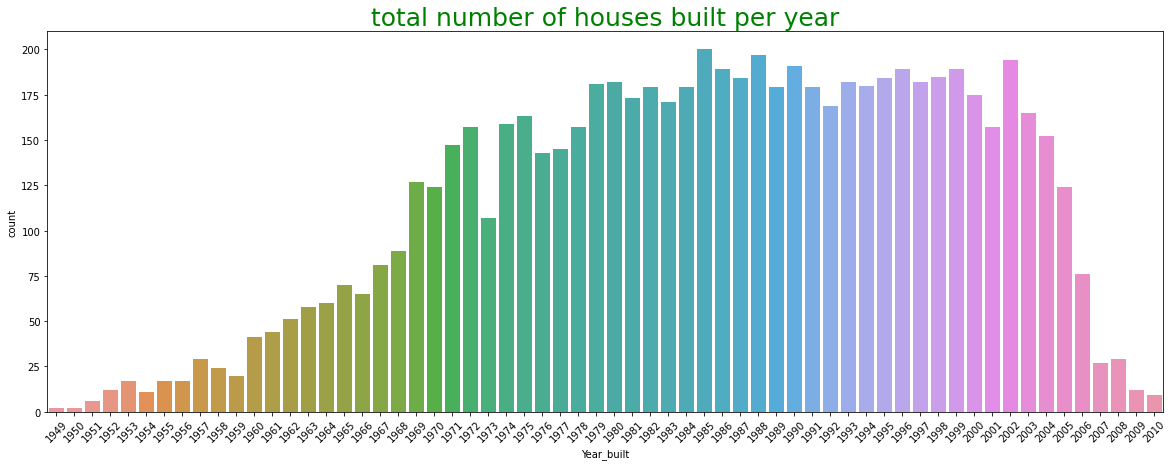

In [157]:
plt.figure(figsize=(20,7))
sns.countplot(df['Year_built'])
plt.title("total number of houses built per year",color='g',size=25)
plt.xticks(rotation=45)

More number of houses are built in 1985 followed by 1988.

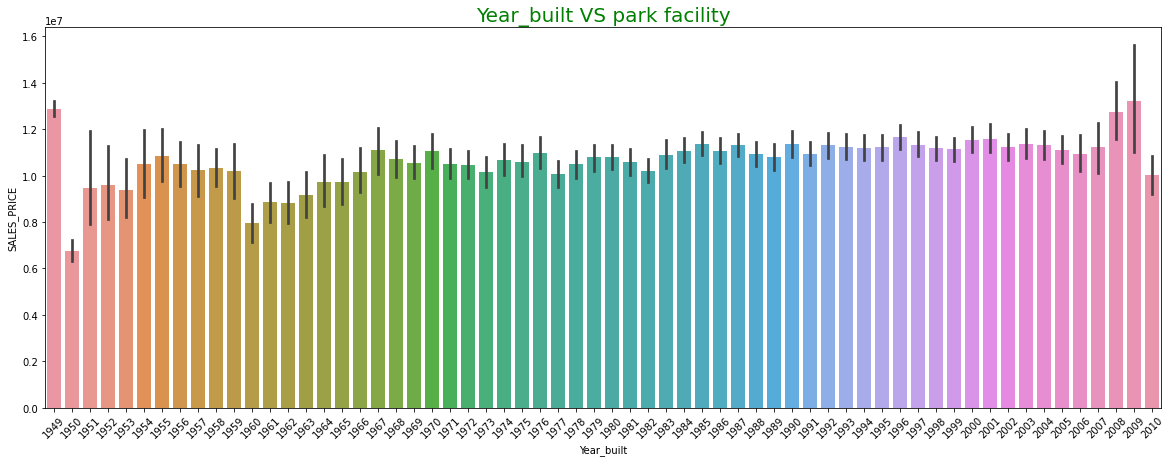

,Year_built,SALES_PRICE
Year_built,1.000000,0.116043
SALES_PRICE,0.116043,1.000000


In [158]:
plt.figure(figsize=(20,7))
sns.barplot(x='Year_built',y='SALES_PRICE',data=df)
plt.title("Year_built VS park facility",color='g',size=20)
plt.xticks(rotation=45)
plt.show()
df[['Year_built','SALES_PRICE']].corr()

**Insights from feature vs target variable:**

As there is no linear relationship between year_built and sales price.Having tried all trasnformations and still not able to see a good linear relationship so dropping the feature.


## **19)Property_age**

In [159]:
df['Property_age'].value_counts()[:10]

19    210
20    208
5     204
22    200
28    200
16    192
12    189
8     189
7     188
30    186
Name: Property_age, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]), <a list of 53 Text major ticklabel objects>)

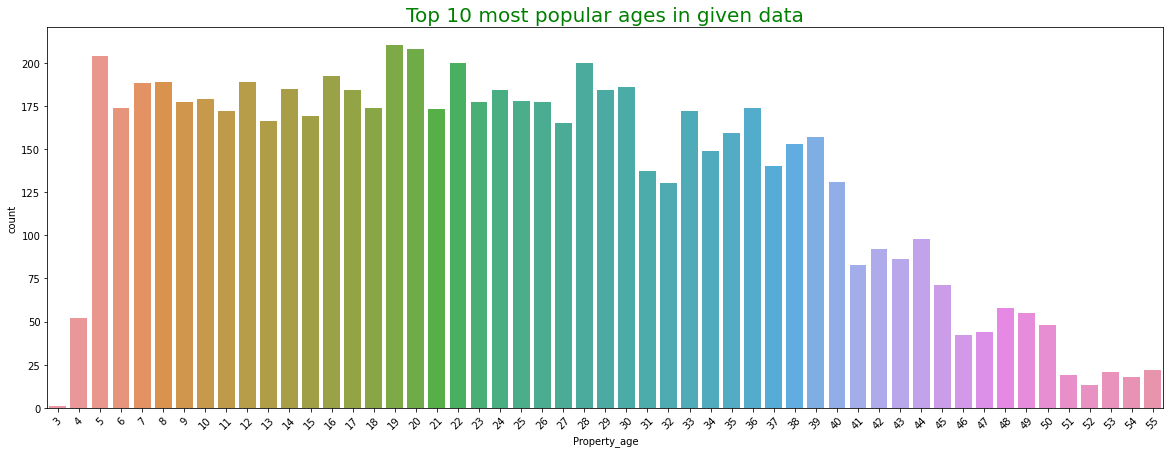

In [160]:
plt.figure(figsize=(20,7))
sns.countplot(df['Property_age'])
plt.title("Top 10 most popular ages in given data",color='g',size=20)
plt.xticks(rotation=45)

In [161]:
df['Property_age']

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: Property_age, Length: 7109, dtype: int64

19 years is the property age for most of the houses. Followed by 20 & 5 years

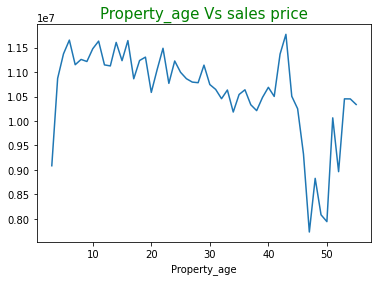

,Property_age,SALES_PRICE
Property_age,1.000000,-0.118842
SALES_PRICE,-0.118842,1.000000


In [163]:
df.groupby('Property_age')['SALES_PRICE'].mean().plot()
plt.title("Property_age Vs sales price",color='g',size=15)
plt.show()
df[['Property_age','SALES_PRICE']].corr()

**Insights from feature vs target variable:**

1.   There is slightly negative linear relationship between property age and sales price.

2.   As property age increase, sales price decreases, which is inline with our general knowledge.

3.  No transformation required. This feature will be useful for us in fitting the model.

## **Major insights from Exploratory data analysis**

1. The distribution of data in all the columns is normally distributed. Only in some of the columns the data is very lightly skewed.
                                                                           
2. AREA, INT_SQFT, N_BEDROOM, N_BATHROOM, N_ROOM', PARK_FACIL, BUILDTYPE,UTILITY_AVAIL, STREET, MZZONE, & Property_age has relation ship with data. These features are important to build the model.
                                                                          
3. DATE_SALE, DATE_BUILD, DIST_MAINROAD, SALE_COND, QS_ROOMS, QS_BATHROOM,QS_BEDROOM, QS_OVERALL, Year_built and Year_sold doesn't have any relationship with data. so I have decided to drop these features.

4. For all the categorical features, there is ordinal relationship with sales price except for Build_type(which doesn't have linear relationship with target variable). So one-hot encoding is required only for build_type. For all the other categorical features, I decided to do label encoding.

# **Deleting unwanted columns**

In [164]:
df=df.drop(['DATE_SALE','DATE_BUILD','DIST_MAINROAD','SALE_COND','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','Year_built','Year_sold','transformed'],axis=1)

In [165]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE',
       'Property_age'],
      dtype='object')

# **Encoding**

In [166]:
df['AREA'] = df['AREA'].map({'Karapakkam':1,'Adyar':2,'Chrompet':3,'Velachery':4,'KK Nagar':5,'Anna Nagar':6,'T Nagar':7})
df = pd.get_dummies(df, columns=['BUILDTYPE'])
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].map({'ELO':1,'NoSeWa':2,'AllPub':3})
df['STREET'] = df['STREET'].map({'No Access':1,'Paved':2,'Gravel':3})
df['MZZONE'] = df['MZZONE'].map({'A':0,'C':1,'I':2,'RH':4,'RL':5,'RM':6})
df['PARK_FACIL'] = df['PARK_FACIL'].map({'Yes':1, 'No':0})

In [167]:
len(df.columns)

14

In [168]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,Property_age,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,1,1,3,1,3,2,0,7600000,44,1,0,0
1,6,1986,2,1,5,0,3,3,4,21717770,11,1,0,0
2,2,909,1,1,3,1,1,3,5,13159200,20,1,0,0
3,4,1855,3,2,5,0,2,2,2,9630290,22,0,0,1
4,1,1226,1,1,3,1,3,3,1,7406250,30,0,0,1


In [169]:
df.dtypes

AREA                    int64
INT_SQFT                int64
N_BEDROOM               int64
N_BATHROOM              int64
N_ROOM                  int64
PARK_FACIL              int64
UTILITY_AVAIL           int64
STREET                  int64
MZZONE                  int64
SALES_PRICE             int64
Property_age            int64
BUILDTYPE_Commercial    uint8
BUILDTYPE_House         uint8
BUILDTYPE_Others        uint8
dtype: object

# **Data preparation and splitting**

In [170]:
X = df.drop(['SALES_PRICE'],axis=1)
y = df['SALES_PRICE']

In [171]:
print(f"Independent features has {X.shape[0]} rows and {X.shape[1]} columns")
print(f"Dependent features has {y.shape[0]} rows and 1 columns")

Independent features has 7109 rows and 13 columns
Dependent features has 7109 rows and 1 columns


In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [173]:
print("The shape of X train:", X_train.shape)
print("The shape of X test:", X_test.shape)
print("The shape of y train:", y_train.shape)
print("The shape of y test:", y_test.shape)

The shape of X train: (5687, 13)
The shape of X test: (1422, 13)
The shape of y train: (5687,)
The shape of y test: (1422,)


# **Scaling the data**

In [174]:
scaler = StandardScaler() #initialising the scaler
scaler.fit(X_train) # finds the values of mu and sigma
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) # transforming the test dataset, rather than fitting it

In [175]:
X_train_scaled

array([[-1.37646011,  0.02827403,  0.44611474, ..., -0.69882318,
        -0.72320924,  1.42983655],
       [-0.83529671, -1.60324875, -0.79328659, ...,  1.43097715,
        -0.72320924, -0.69938064],
       [ 1.87052032,  0.78514356, -0.79328659, ...,  1.43097715,
        -0.72320924, -0.69938064],
       ...,
       [-0.2941333 , -0.54755754, -0.79328659, ..., -0.69882318,
         1.3827257 , -0.69938064],
       [ 0.78819351,  1.19084307,  1.68551607, ..., -0.69882318,
        -0.72320924,  1.42983655],
       [-1.37646011, -0.71550841, -0.79328659, ...,  1.43097715,
        -0.72320924, -0.69938064]])

# **Linear regession**

In [176]:
regressor = LinearRegression() # predicted score = m * hours + c  
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [177]:
print(regressor.intercept_) # c
print(regressor.coef_) # m values

-348266.01773652434
[ 5.64851497e+05  1.56542826e+03 -1.59318445e+06  2.73895031e+05
  1.68328574e+06  1.00829646e+06  6.69326682e+04  4.91977334e+05
  4.70264217e+05 -1.72506838e+04  2.87661869e+06 -1.78135656e+06
 -1.09526213e+06]


In [178]:
y_pred = regressor.predict(X_test) ##predicting

In [179]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
4348,12439640,1.275081e+07
4044,7729125,7.712630e+06
6212,10991250,1.072313e+07
1040,8783500,9.890393e+06
363,9894250,9.787788e+06


In [181]:
R2_score_lr = metrics.r2_score(y_test,y_pred)
print('linear regression R2 score is :', R2_score_lr)

linear regression R2 score is : 0.9162162952601399


# **K Nearest Neighbor Regression**

**Choosing the best K(neighbor) Value**

In [182]:
cross_val_knn=[]
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsRegressor(i) #initialising the model
  knn.fit(X_train_scaled,y_train) # training the model
  cross_val = np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)) # SCaling for KNN
  print("K value  : " , i, " train score : ", knn.score(X_train_scaled,y_train) , "Cross_val score : ",cross_val )
  cross_val_knn.append(cross_val)

K value  :  1  train score :  0.9999970226465024 Cross_val score :  0.9351379659678761
K value  :  2  train score :  0.9847171938529105 Cross_val score :  0.9476576132961746
K value  :  3  train score :  0.978148333216285 Cross_val score :  0.9517407586548057
K value  :  4  train score :  0.9741021808874779 Cross_val score :  0.9527392190989001
K value  :  5  train score :  0.9708872812943816 Cross_val score :  0.9522405850506436
K value  :  6  train score :  0.9680249240306233 Cross_val score :  0.9516334982611125
K value  :  7  train score :  0.9659907551724014 Cross_val score :  0.9509341224425361
K value  :  8  train score :  0.9637687648919094 Cross_val score :  0.9498730140293098
K value  :  9  train score :  0.9621280555029519 Cross_val score :  0.9488256201405025
K value  :  10  train score :  0.9605407669145161 Cross_val score :  0.9481265559971112
K value  :  20  train score :  0.9489780369452283 Cross_val score :  0.9403465301042591
K value  :  50  train score :  0.925498496

In [183]:
print("Best K-Value is {} and Cross_val_score is: {}".format(np.argmax(cross_val_knn) + 1, max(cross_val_knn)))

Best K-Value is 4 and Cross_val_score is: 0.9527392190989001


#### **Implementing KNN regression with best k value**


In [184]:
knn = KNeighborsRegressor(5) # at k=3 got the best cross val score(Average of evaluation metric)
knn.fit(X_train_scaled,y_train)

KNeighborsRegressor()

In [185]:
y_pred=knn.predict(X_test_scaled) # Predicting
print(y_pred)

[12576358.  8296825.  9796870. ...  6161355.  9629842. 12277990.]


In [186]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
4348,12439640,12576358.0
4044,7729125,8296825.0
6212,10991250,9796870.0
1040,8783500,9159650.0
363,9894250,9635906.0


In [187]:
R2_score_knn = metrics.r2_score(y_test,y_pred)
print('R^2 score for KNN regression:', R2_score_knn)

R^2 score for KNN regression: 0.9529977208892308


# **Decission tree Regression**

**Finding best value of max_depth(Hyper parameter tuning)**

In [188]:
max_depth=np.arange(1,20)
for depth in max_depth:
  dt = DecisionTreeRegressor(max_depth=depth) 
  dt.fit(X_train, y_train) 
  #trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) 
  dt = DecisionTreeRegressor(max_depth=depth) 
  valAccuracy = cross_val_score(dt, X_train_scaled, y_train, cv=10) 
  print("Depth  : ", depth, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Cross val score :  0.36351267091116257
Depth  :  2  Cross val score :  0.6841266466354856
Depth  :  3  Cross val score :  0.803700780018967
Depth  :  4  Cross val score :  0.881890462785171
Depth  :  5  Cross val score :  0.9163024759366412
Depth  :  6  Cross val score :  0.9370662309927444
Depth  :  7  Cross val score :  0.9498943660033226
Depth  :  8  Cross val score :  0.9610572207768037
Depth  :  9  Cross val score :  0.9686134071476694
Depth  :  10  Cross val score :  0.9725849900675924
Depth  :  11  Cross val score :  0.9740451180415729
Depth  :  12  Cross val score :  0.9746221015888858
Depth  :  13  Cross val score :  0.9746583400924491
Depth  :  14  Cross val score :  0.9749626102287634
Depth  :  15  Cross val score :  0.9750787882307115
Depth  :  16  Cross val score :  0.9751345068590052
Depth  :  17  Cross val score :  0.9745152004703721
Depth  :  18  Cross val score :  0.9746889283489782
Depth  :  19  Cross val score :  0.9745420090430631


#### **Implementing Decision Tree Regression with the best max_depth**

In [189]:
dt = DecisionTreeRegressor(max_depth=16) # max_depth = 16 is the best value as it has high cross val score
dt.fit(X_train_scaled, y_train) 

DecisionTreeRegressor(max_depth=16)

In [190]:
y_pred = dt.predict(X_test_scaled)
y_pred

array([12397590.,  6922750., 10180900., ...,  5020500.,  9244630.,
       13208750.])

In [191]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4348,12439640,12397590.0
4044,7729125,6922750.0
6212,10991250,10180900.0
1040,8783500,8710250.0
363,9894250,9966750.0
...,...,...
6029,11842250,11531600.0
5965,6620420,6114295.0
2091,6297250,5020500.0
3274,9514610,9244630.0


In [193]:
R2_score_dt = metrics.r2_score(y_test,y_pred)
print('Decission tree regression R2 score is:', R2_score_dt)

Decission tree regression R2 score is: 0.9734918534000067


### **Feature Importances**

In [194]:
len(dt.feature_importances_)

13

In [195]:
ftimp = list(zip(dt.feature_importances_, X))
imp = pd.DataFrame(ftimp, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
0,0.485381,AREA
10,0.320300,BUILDTYPE_Commercial
1,0.104073,INT_SQFT
8,0.038819,MZZONE
5,0.016381,PARK_FACIL
7,0.011541,STREET
4,0.010505,N_ROOM
9,0.005632,Property_age
12,0.003481,BUILDTYPE_Others
11,0.001737,BUILDTYPE_House


# **Random Forest Regression**

In [196]:
# Instantiate model # max depth = log2 13 is 3.7.i.e, 4 fearures = sqrt(12) # To control overfitting
rf = RandomForestRegressor(n_estimators= 100, max_depth = 4, max_features='sqrt')
rf.fit(X_train_scaled,y_train)

RandomForestRegressor(max_depth=4, max_features='sqrt')

In [198]:
y_pred = rf.predict(X_test_scaled)
y_pred

array([12399166.85061716,  8832729.07181115, 10891404.12675661, ...,
        7196903.78309815,  9401630.64369308, 11514016.7716406 ])

In [199]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
4348,12439640,1.239917e+07
4044,7729125,8.832729e+06
6212,10991250,1.089140e+07
1040,8783500,1.060081e+07
363,9894250,9.768925e+06


In [200]:
R2_score_rf = metrics.r2_score(y_test,y_pred)
print('R^2 score for Random forest regression:', R2_score_rf)

R^2 score for Random forest regression: 0.8677008886604387


# **XG Boost**

In [203]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,0.75,0.8,0.9,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train_scaled,y_train) #train the model
  print("Learning rate : ", lr, " Cross-Val score : ", np.mean(cross_val_score(model, X_train_scaled, y_train, cv=15)))

Learning rate :  0.01  Cross-Val score :  -0.387095940790903
Learning rate :  0.02  Cross-Val score :  0.7433493133249462
Learning rate :  0.03  Cross-Val score :  0.922688604620405
Learning rate :  0.04  Cross-Val score :  0.9603059162082908
Learning rate :  0.05  Cross-Val score :  0.9724270253311752
Learning rate :  0.06  Cross-Val score :  0.978355338819551
Learning rate :  0.07  Cross-Val score :  0.9825943603447252
Learning rate :  0.08  Cross-Val score :  0.985390817302518
Learning rate :  0.09  Cross-Val score :  0.9875800384258184
Learning rate :  0.1  Cross-Val score :  0.988945204426858
Learning rate :  0.11  Cross-Val score :  0.9901337275592647
Learning rate :  0.12  Cross-Val score :  0.9908882219814273
Learning rate :  0.13  Cross-Val score :  0.9912271487369113
Learning rate :  0.14  Cross-Val score :  0.9918284225176599
Learning rate :  0.15  Cross-Val score :  0.9921874582215738
Learning rate :  0.2  Cross-Val score :  0.9931138952151
Learning rate :  0.5  Cross-Val s

#### **Implementing XG boost Regression with the best learning rate**

In [204]:
model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100)
model.fit(X_train_scaled,y_train) #train the model  

[12:21:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.7)

In [205]:
model.score(X_test_scaled, y_test) # scoring the model - r2 squared 

0.9938977098990398

In [206]:
y_pred = model.predict(X_test_scaled)
y_pred

array([12291058. ,  8313824.5, 10760582. , ...,  6102005. ,  9820306. ,
       12743828. ], dtype=float32)

In [208]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
4348,12439640,12291058.0
4044,7729125,8313824.5
6212,10991250,10760582.0
1040,8783500,8531148.0
363,9894250,9962422.0


In [209]:
R2_score_xgb = metrics.r2_score(y_test,y_pred)
print('XG boost regression R2 score is :', R2_score_xgb)

XG boost regression R2 score is : 0.9938977098990398


# **Evalution metric of all ML models**

In [210]:
print("R2 Score for Linear Regression Model:",R2_score_lr)
print("R2 Score for K-Nearest Neighbors Regression Model:",R2_score_knn)
print("R2 Score for Decision Tree Regression Model: ",R2_score_dt)
print("R2 Score for Random Forest Regression Model: ",R2_score_rf)
print("R2 Score for Extreme-Gradient Boosting Regression Model: ",R2_score_xgb)

R2 Score for Linear Regression Model: 0.9162162952601399
R2 Score for K-Nearest Neighbors Regression Model: 0.9529977208892308
R2 Score for Decision Tree Regression Model:  0.9734918534000067
R2 Score for Random Forest Regression Model:  0.8677008886604387
R2 Score for Extreme-Gradient Boosting Regression Model:  0.9938977098990398


# **Suggestion to Sellers and buyers**-based on Feature Importance

In [211]:
rf.feature_importances_

array([2.67135298e-01, 1.64892728e-01, 2.87279479e-02, 3.96013238e-03,
       1.21863723e-01, 5.29915519e-03, 2.29937684e-04, 2.03407996e-03,
       8.57226813e-02, 4.03350892e-03, 2.27748567e-01, 7.23603393e-02,
       1.59919013e-02])

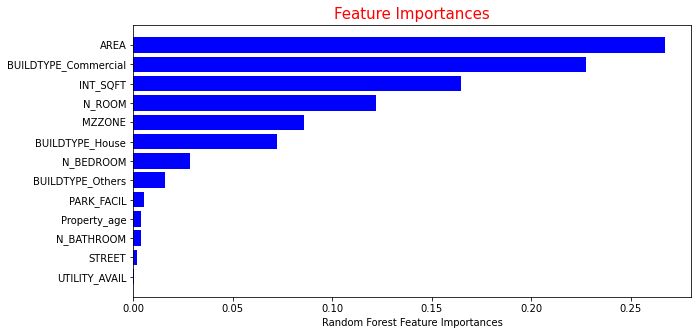

In [214]:
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx], color="blue")
plt.xlabel("Random Forest Feature Importances")
plt.title("Feature Importances",color='r',size=15)
plt.show()

In [215]:
model.feature_importances_

array([0.39537892, 0.02894108, 0.02326312, 0.00078186, 0.02828919,
       0.05491993, 0.00311936, 0.01657425, 0.02315848, 0.00243404,
       0.40476215, 0.01714509, 0.00123248], dtype=float32)

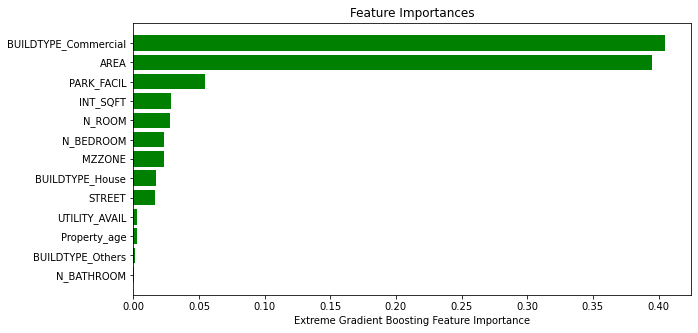

In [216]:
sorted_idx = model.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(X.columns[sorted_idx], model.feature_importances_[sorted_idx], color="g")
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importances")
plt.show()

## **Suggestion to Sellers**


From the above , Based on the feature importance given by Machine Learning Algorithm(Extreme Gradient Boosting), Sellers should Focus on the features in the order given below to build homes that fetch more money:


1. Build_type(Commercial,House etc..)-Commercial is best

2. Area(location) of the building,

3. Parking Facility,

4. Area(SQFT) of the building,

5. No. of rooms,

6. No. of bedrooms

7. MZ Zone,

8. Build_type(Commercial,House etc..)-House

9. Street(Paved, Gravel, No access, etc.) of the building,

10. Utility available

11. Age of Building,

12. Build_type(Commercial,House etc..)-others

13. No. of Bathrooms,




